In [5]:
# importing libraries
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = pd.read_csv("D:\\Ayesha\\IBA Data Science\\Semester 3\\ML II\\superconduct\\train.csv")

In [7]:
def validationmetrics_reg(model,testX,testY, verbose=True):
    global r2, rmse
    
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions)
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("RMSE: ", rmse)
    
    res_map = {
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "rmse": rmse,
                "model_obj": model,
              }
    return res_map

In [8]:
def LinearReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LinearRegression()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def RandomForestReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = RandomForestRegressor(n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def SupportVectorRegression(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = SVR(kernel="rbf")
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def DecisionTreeReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def GradientBoostingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def AdaBooostReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostRegressor(random_state=0, n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def VotingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
    if not clf:
        clf = VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb), ('ab', ab)])
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)


# 1- Random Forest Selection

Calculated the feature importances and sort them "range_thermal conductivity" has high importance.

In [9]:
model= RandomForestRegressor(n_estimators=100,random_state=0)
X=data.drop('critical_temp',axis=1)
Y=data['critical_temp']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

range_ThermalConductivity        0.539082
wtd_gmean_ThermalConductivity    0.126712
std_Density                      0.019280
wtd_gmean_Valence                0.016501
std_atomic_mass                  0.014404
                                   ...   
range_Density                    0.000648
mean_Valence                     0.000310
range_FusionHeat                 0.000242
range_Valence                    0.000149
number_of_elements               0.000037
Length: 81, dtype: float64

In [10]:
from sklearn.feature_selection import SelectFromModel
import matplotlib
import matplotlib.pyplot as plt

Train the regression models from random forest selection.

Index(['std_atomic_mass', 'std_Density', 'wtd_gmean_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_gmean_Valence'],
      dtype='object')
Multi Linear Regression From Random Forest Selection
R-Squared Value:  0.5181707175755262
Adjusted R-Squared:  0.5178270937826119
RMSE:  23.60468695366733
Voting Regression From Random Forest Selection
R-Squared Value:  0.869522850644841
Adjusted R-Squared:  0.8694297989051782
RMSE:  12.283408073890222
Index(['std_atomic_mass', 'mean_Density', 'std_Density',
       'gmean_ElectronAffinity', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_mean_Valence', 'wtd_gmean_Valence', 'wtd_std_Valence'],
      dtype='object')
Multi Linear Regression From Random Forest Selection
R-Squared Value:  0.5626137287693218
Adjusted R-Squared:  0.5619894263553471
RMSE:  22.48972907819066
Voting Regression From Random Forest Selection
R-Squared Value:  0.8785907837387855
Adjusted R-Squared:

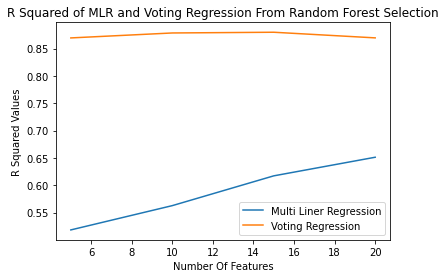

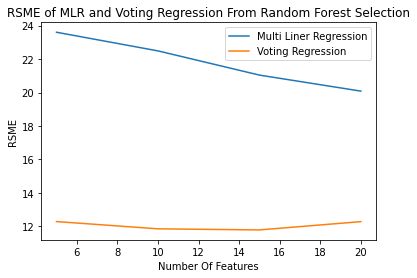

In [11]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestRegressor(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Multi Linear Regression From Random Forest Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression From Random Forest Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From Random Forest Selection')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From Random Forest Selection')
plt.legend()
plt.show()

# Interpretation
R Squared values increases in Multi Linear Regression when number of features increases.
RMSE decreases in Multi Linear Regression when number of features icreases.

R Squared values does not affect much in Voting Regression when number of features increases.
RSME also doesnot affect much in Voting Regression when number of features increases.
Also Voting Regression has low RMSE values and high R squared values which indicates Voting Regression better predicts the data. 

Random Forest Selection works better/useful with Voting Regression

# 2- XGboost Selection

In [12]:
from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=100,random_state=0)
X=data.drop('critical_temp',axis=1)
Y=data['critical_temp']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

range_ThermalConductivity        0.769061
wtd_gmean_ThermalConductivity    0.045722
range_atomic_radius              0.025924
gmean_ElectronAffinity           0.014616
std_Density                      0.013008
                                   ...   
range_Density                    0.000443
wtd_range_FusionHeat             0.000443
wtd_entropy_atomic_mass          0.000342
mean_atomic_mass                 0.000177
number_of_elements               0.000042
Length: 81, dtype: float32

Index(['range_atomic_radius', 'std_Density', 'gmean_ElectronAffinity',
       'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity'],
      dtype='object')
Multi Linear Regression From XGboost Selection
R-Squared Value:  0.5518843072987917
Adjusted R-Squared:  0.551564726858982
RMSE:  22.763903012479084
Voting Regression  From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  0.8543184437912128
Adjusted R-Squared:  0.854214548800335
RMSE:  12.979379660433633
Index(['std_atomic_mass', 'range_atomic_radius', 'mean_Density',
       'gmean_Density', 'std_Density', 'gmean_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_gmean_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_gmean_Valence'],
      dtype='object')
Multi Linear Regression From XGboost Selection
R-Squared Value:  0.5560957819688552
Adjusted R-Squared:  0.5554621761766327
RMSE:  22.656680795860538
Voting Regression  From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  0.878691540097853
Adjusted R-Squared:  0.8785183907117523
RMSE:  11.843967164255798
Index(['std_atomic_mass', 'range_atomic_radius', 'mean_Density',
       'gmean_Density', 'std_Density', 'gmean_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_mean_Valence', 'wtd_gmean_Valence', 'wtd_range_Valence'],
      dtype='object')
Multi Linear Regression From XGboost Selection
R-Squared Value:  0.6313954632066283
Adjusted R-Squared:  0.6306057091640771
RMSE:  20.6458129467201
Voting Regression  From XGboost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  0.8811695442096289
Adjusted R-Squared:  0.8809149438901237
RMSE:  11.72237287370088


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['std_atomic_mass', 'range_atomic_radius', 'std_atomic_radius',
       'mean_Density', 'gmean_Density', 'entropy_Density', 'std_Density',
       'gmean_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_mean_Valence', 'wtd_gmean_Valence', 'range_Valence',
       'wtd_range_Valence', 'wtd_std_Valence'],
      dtype='object')
Multi Linear Regression From XGboost Selection
R-Squared Value:  0.6554170934914909
Adjusted R-Squared:  0.6544320079954689
RMSE:  19.96174553692561
Voting Regression  From XGboost Selection
R-Squared Value:  0.8841322415170679
Adjusted R-Squared:  0.8838010014985347
RMSE:  11.575318585387127


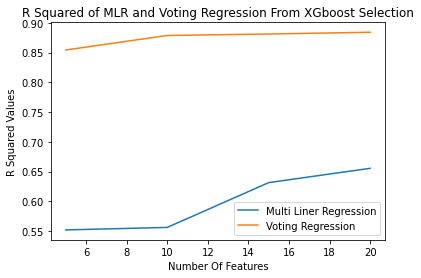

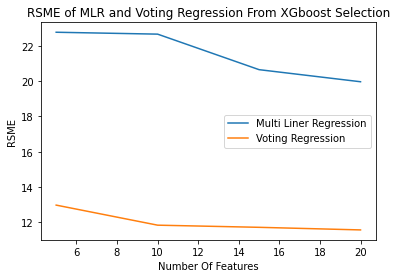

In [13]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(XGBRegressor(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Multi Linear Regression From XGboost Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression  From XGboost Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From XGboost Selection')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From XGboost Selection')
plt.legend()
plt.show()

# Interpretation
R squared values of Voting Regression increases and becomes constant after 10 features
RSME of voting regression decreases and becomes constant after 10 features.

R squared values of MLR increases with number of features.
RSME decreases with number of features.

The values of R squared of Voting Regression is much larger means it overfits the model.
MLR from random forest selection is more suitable. But MLR from xgboost selection is not useful as RSME keeps decresing and not becoming constant. 

# 3- RFE Selection 

In [14]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

Index(['std_Density', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_mean_Valence'],
      dtype='object')
Multi Linear Regression From Recursive Feature Elimination
R-Squared Value:  0.5130317944052949
Adjusted R-Squared:  0.5126845057121022
RMSE:  23.730230329505112
Voting Regression From From Recursive Feature Elimination
R-Squared Value:  0.8629725200498449
Adjusted R-Squared:  0.8628747968434904
RMSE:  12.587963806446398
Index(['wtd_mean_atomic_mass', 'gmean_Density', 'std_Density',
       'wtd_mean_ElectronAffinity', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_range_Valence'],
      dtype='object')
Multi Linear Regression From Recursive Feature Elimination
R-Squared Value:  0.569332866078319
Adjusted R-Squared:  0.5687181542114597
RMSE:  22.316316658296813
Voting Regression From From Recursi

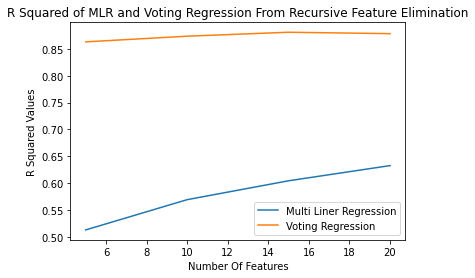

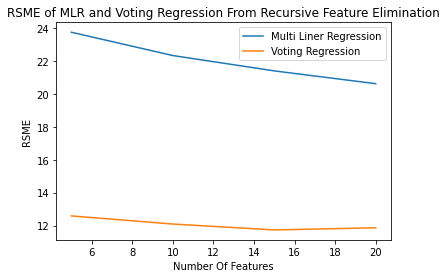

In [15]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = RFE(estimator = DecisionTreeRegressor(), n_features_to_select = n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Multi Linear Regression From Recursive Feature Elimination")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression From From Recursive Feature Elimination")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From Recursive Feature Elimination')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From Recursive Feature Elimination')
plt.legend()
plt.show()

# Interpretation
R squared values of MLR increases with the number of features.
RSME decreases with number of features.

Values of R squared and RSME becomes constant 15 features.
Voting regression with 15 features is better as the RSME is minimum and R square is maximum. 

#  4- Lasso Regression For Feature Selection

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.6925953654572, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8560.101722069085, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11868.474298362155, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWa

Index(['entropy_atomic_mass', 'wtd_entropy_fie', 'wtd_entropy_atomic_radius',
       'wtd_entropy_FusionHeat', 'wtd_entropy_Valence'],
      dtype='object')
Multi Linear Regression From  L1 Based Feature Selection
R-Squared Value:  0.4048674148514735
Adjusted R-Squared:  0.4044429871056823
RMSE:  26.23363761570604
Voting Regression  From  L1 Based Feature Selection
R-Squared Value:  0.8048985448127747
Adjusted R-Squared:  0.8047594052783379
RMSE:  15.020414048694745


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.6925953654572, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8560.101722069085, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11868.474298362155, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWa

Index(['entropy_atomic_mass', 'wtd_entropy_fie', 'wtd_entropy_atomic_radius',
       'wtd_entropy_Density', 'wtd_entropy_ElectronAffinity',
       'wtd_entropy_FusionHeat', 'wtd_entropy_ThermalConductivity',
       'entropy_Valence', 'wtd_entropy_Valence', 'wtd_std_Valence'],
      dtype='object')
Multi Linear Regression From  L1 Based Feature Selection
R-Squared Value:  0.5614530594364191
Adjusted R-Squared:  0.560827100343408
RMSE:  22.519549223864455
Voting Regression  From  L1 Based Feature Selection
R-Squared Value:  0.8508592314549931
Adjusted R-Squared:  0.8506463556791652
RMSE:  13.132573451642838


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.6925953654572, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8560.101722069085, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11868.474298362155, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWa

Index(['number_of_elements', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'wtd_entropy_fie', 'wtd_entropy_atomic_radius', 'entropy_Density',
       'wtd_entropy_Density', 'wtd_entropy_ElectronAffinity',
       'wtd_entropy_FusionHeat', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'entropy_Valence',
       'wtd_entropy_Valence', 'range_Valence', 'wtd_std_Valence'],
      dtype='object')
Multi Linear Regression From  L1 Based Feature Selection
R-Squared Value:  0.6000664718119778
Adjusted R-Squared:  0.5992095938055758
RMSE:  21.505302576580565
Voting Regression  From  L1 Based Feature Selection
R-Squared Value:  0.8564700899479083
Adjusted R-Squared:  0.8561625697863912
RMSE:  12.88317352809191


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.6925953654572, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8560.101722069085, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11868.474298362155, tolerance: 1351.1733175218094
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWa

Index(['number_of_elements', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'entropy_fie', 'wtd_entropy_fie', 'wtd_entropy_atomic_radius',
       'entropy_Density', 'wtd_entropy_Density',
       'wtd_entropy_ElectronAffinity', 'std_ElectronAffinity',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'wtd_std_Valence'],
      dtype='object')
Multi Linear Regression From  L1 Based Feature Selection
R-Squared Value:  0.6231081430587291
Adjusted R-Squared:  0.6220306934962898
RMSE:  20.876612361979493
Voting Regression  From  L1 Based Feature Selection
R-Squared Value:  0.8699327065594374
Adjusted R-Squared:  0.8695608732448561
RMSE:  12.264100527536394


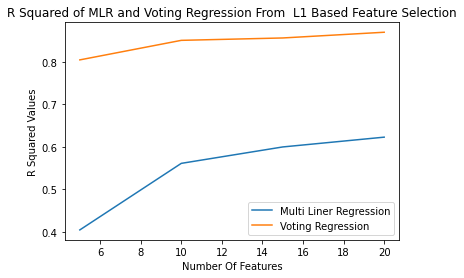

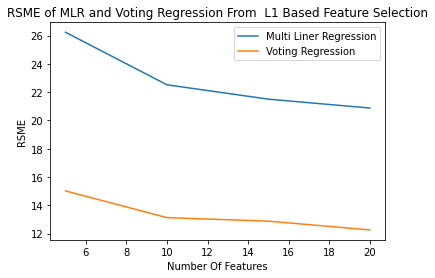

In [17]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)
    fs = SelectFromModel(estimator,threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Multi Linear Regression From  L1 Based Feature Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression  From  L1 Based Feature Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From  L1 Based Feature Selection')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From  L1 Based Feature Selection')
plt.legend()
plt.show()

# Interpretation
R squared values of MLR increases with the number of features.
RSME of MLR decreases with number of features.

R squared values of Voting Regression increases with the number of features.
RSME of MLR decreases with number of features.

Voting regression is better as the RSME is minimum and R square is maximum. 
L1 feature based selection is not much useful. 

# 5- PCA

[3.89853312e-01 1.04551838e-01 9.43542588e-02 7.91970379e-02
 5.85713832e-02 3.78783638e-02 3.67948898e-02 3.13805473e-02
 2.36501982e-02 1.97406251e-02 1.81680787e-02 1.48050879e-02
 1.19684117e-02 9.89664776e-03 9.78421517e-03 7.85026555e-03
 6.98664410e-03 5.36693583e-03 4.80434990e-03 3.80531140e-03
 3.05128077e-03 2.85991489e-03 2.54968407e-03 2.07640768e-03
 1.96277586e-03 1.89131063e-03 1.67906358e-03 1.44420964e-03
 1.26366961e-03 1.13695467e-03 1.02242723e-03 9.61300060e-04
 9.04441390e-04 7.12047428e-04 6.85657579e-04 6.19694710e-04
 5.68294834e-04 4.96136388e-04 4.36955972e-04 4.17258685e-04
 3.23831612e-04 3.09784245e-04 2.52968463e-04 2.38174139e-04
 2.19595997e-04 2.17682481e-04 1.91253042e-04 1.86369626e-04
 1.79603781e-04 1.74033132e-04 1.55825509e-04 1.52907937e-04
 1.27517408e-04 1.18046486e-04 1.15146572e-04 1.05083395e-04
 8.81799240e-05 8.10206420e-05 7.85310887e-05 7.14871386e-05
 6.38325270e-05 5.64324773e-05 4.43232420e-05 4.29288142e-05
 3.93212787e-05 3.478796

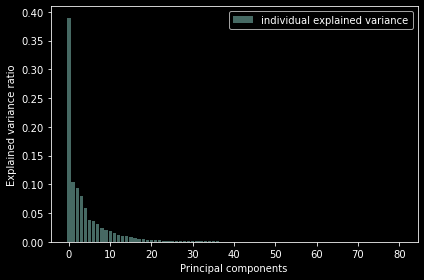

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(81), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  5  Components:
[0.38985331 0.10455184 0.09435426 0.07919704 0.05857138]


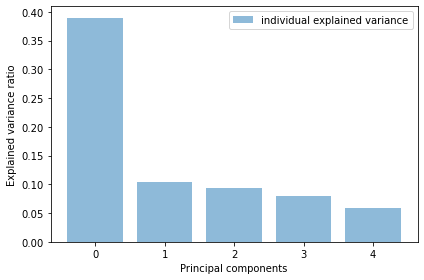

Multi Linear Regression From  PCA:  5
R-Squared Value:  0.5354602893326827
Adjusted R-Squared:  0.5351289958576668
RMSE:  23.177312302776844
Voting Regression  From  PCA:  5
R-Squared Value:  0.8261420620685951
Adjusted R-Squared:  0.8260180726677027
RMSE:  14.179108059825976
Explained Variance Ratio of  10  Components:
[0.38985331 0.10455184 0.09435426 0.07919704 0.05857138 0.03787836
 0.03679489 0.03138055 0.0236502  0.01974062]


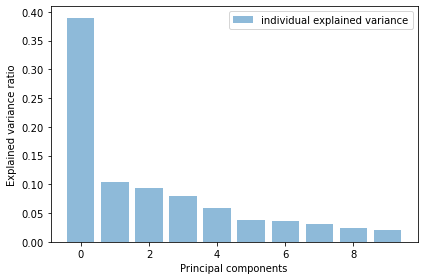

Multi Linear Regression From  PCA:  10
R-Squared Value:  0.5717427881580673
Adjusted R-Squared:  0.5711315160886383
RMSE:  22.25379037355902
Voting Regression  From  PCA:  10
R-Squared Value:  0.8524400702747343
Adjusted R-Squared:  0.8522294509060143
RMSE:  13.062787741648505
Explained Variance Ratio of  15  Components:
[0.38985331 0.10455184 0.09435426 0.07919704 0.05857138 0.03787836
 0.03679489 0.03138055 0.0236502  0.01974063 0.01816808 0.01480509
 0.01196841 0.00989664 0.00978421]


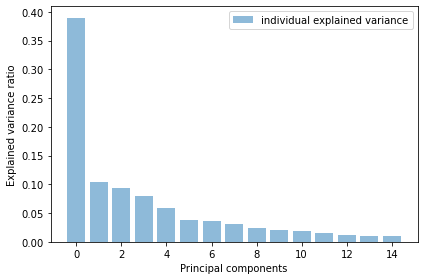

Multi Linear Regression From  PCA:  15
R-Squared Value:  0.597732315551849
Adjusted R-Squared:  0.5968704364964681
RMSE:  21.56796762526334
Voting Regression  From  PCA:  15
R-Squared Value:  0.8611905448599934
Adjusted R-Squared:  0.8608931385141714
RMSE:  12.669549566136672
Explained Variance Ratio of  20  Components:
[0.38985331 0.10455184 0.09435426 0.07919704 0.05857138 0.03787836
 0.03679489 0.03138055 0.0236502  0.01974063 0.01816808 0.01480509
 0.01196841 0.00989665 0.00978422 0.00785027 0.00698664 0.00536694
 0.00480435 0.00380529]


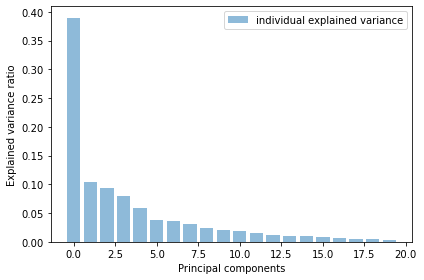

Multi Linear Regression From  PCA:  20
R-Squared Value:  0.6242797345582622
Adjusted R-Squared:  0.6232056343140034
RMSE:  20.844138989709215
Voting Regression  From  PCA:  20
R-Squared Value:  0.8650344261051364
Adjusted R-Squared:  0.8646485897017777
RMSE:  12.492896817315545


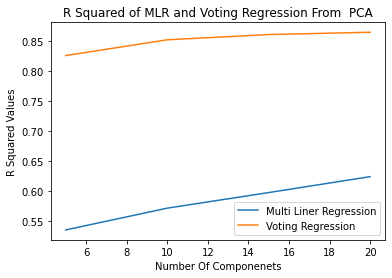

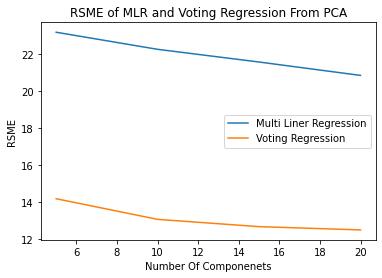

In [19]:
from sklearn.decomposition import PCA
def select_features(X_train, X_test,n):
    global pca
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = n)
    X_train_fs = pca.fit_transform(X_train)
    X_test_fs = pca.transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs = select_features(X_train, X_test,n)
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    print ("Multi Linear Regression From  PCA: ",n)
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression  From  PCA: ",n)
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Componenets')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From  PCA')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Componenets')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From PCA')
plt.legend()
plt.show()

# Interpretation 
After increasing components of PCA both algorithm performs well therefore we can’t reduced the original data to extremely low dimension space using PCA.

# 6- LDA

[5.79899376e-01 1.15042939e-01 6.09616498e-02 3.94695607e-02
 2.59025370e-02 1.84550305e-02 1.56679585e-02 1.30794653e-02
 1.06634349e-02 9.49383780e-03 8.22482182e-03 7.92529293e-03
 6.92781470e-03 6.48552206e-03 5.98006730e-03 4.89534843e-03
 4.57083619e-03 4.33927753e-03 4.20359083e-03 3.62628756e-03
 3.25761522e-03 3.13934547e-03 3.05746476e-03 2.90830291e-03
 2.85630664e-03 2.48520209e-03 2.41358628e-03 2.34662785e-03
 2.31215542e-03 2.24421251e-03 1.93918292e-03 1.73481333e-03
 1.64428448e-03 1.62046312e-03 1.45952584e-03 1.44631633e-03
 1.34052499e-03 1.22922094e-03 1.16198191e-03 1.04610753e-03
 9.94990889e-04 8.82893556e-04 8.12438100e-04 7.78811493e-04
 7.31168530e-04 7.12215487e-04 6.19362171e-04 5.92921923e-04
 5.75483567e-04 5.32139754e-04 4.70036008e-04 4.54917894e-04
 4.31290811e-04 4.03275011e-04 3.68929647e-04 3.38271145e-04
 3.06632551e-04 2.74398512e-04 2.52654599e-04 2.30241121e-04
 2.18230424e-04 1.96919683e-04 1.83792639e-04 1.48371083e-04
 1.30392054e-04 1.253408

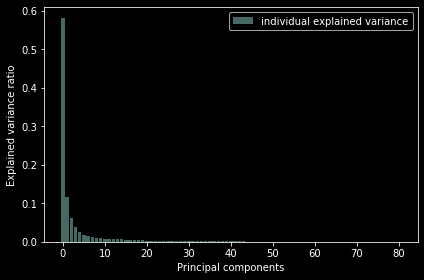

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
y_train = y_train.to_numpy(dtype='int')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(81), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  5  Components:
[0.57989938 0.11504294 0.06096165 0.03946956 0.02590254]


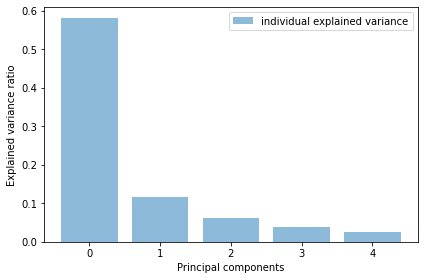

Multi Linear Regression From  LDA:  5
R-Squared Value:  0.7191230208615937
Adjusted R-Squared:  0.718922709223355
RMSE:  18.022279593727134
Voting Regression  From  LDA:  5
R-Squared Value:  0.8437798995226027
Adjusted R-Squared:  0.8436684888105235
RMSE:  13.440644878699342
Explained Variance Ratio of  10  Components:
[0.57989938 0.11504294 0.06096165 0.03946956 0.02590254 0.01845503
 0.01566796 0.01307947 0.01066343 0.00949384]


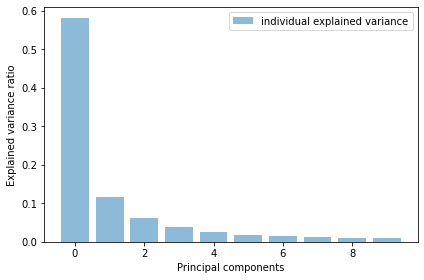

Multi Linear Regression From  LDA:  10
R-Squared Value:  0.7212528168062253
Adjusted R-Squared:  0.7208549475752892
RMSE:  17.95382112105095
Voting Regression  From  LDA:  10
R-Squared Value:  0.8671507430313802
Adjusted R-Squared:  0.8669611209118132
RMSE:  12.394562878356195
Explained Variance Ratio of  15  Components:
[0.57989938 0.11504294 0.06096165 0.03946956 0.02590254 0.01845503
 0.01566796 0.01307947 0.01066343 0.00949384 0.00822482 0.00792529
 0.00692781 0.00648552 0.00598007]


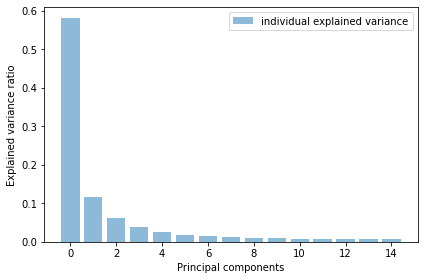

Multi Linear Regression From  LDA:  15
R-Squared Value:  0.7216814954578226
Adjusted R-Squared:  0.7210851838497476
RMSE:  17.940010432358697
Voting Regression  From  LDA:  15
R-Squared Value:  0.8673803997008015
Adjusted R-Squared:  0.8670962554350554
RMSE:  12.383844996512419
Explained Variance Ratio of  20  Components:
[0.57989938 0.11504294 0.06096165 0.03946956 0.02590254 0.01845503
 0.01566796 0.01307947 0.01066343 0.00949384 0.00822482 0.00792529
 0.00692781 0.00648552 0.00598007 0.00489535 0.00457084 0.00433928
 0.00420359 0.00362629]


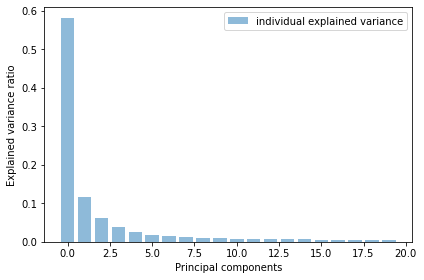

Multi Linear Regression From  LDA:  20
R-Squared Value:  0.7217032763557403
Adjusted R-Squared:  0.7209076882378321
RMSE:  17.93930843595045
Voting Regression  From  LDA:  20
R-Squared Value:  0.8693129461609894
Adjusted R-Squared:  0.8689393410899803
RMSE:  12.293284540013671


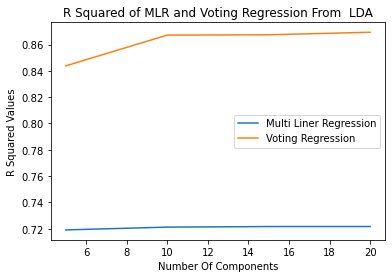

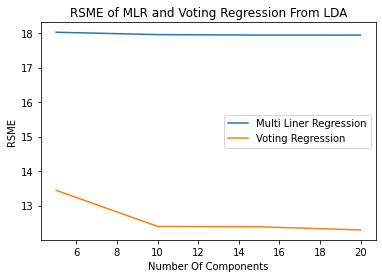

In [21]:
def select_features(X_train, X_test,y_train,n):
    global lda
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = y_train.to_numpy(dtype='int')
    lda = LinearDiscriminantAnalysis(n_components = n)
    X_train_fs = lda.fit_transform(X_train,y_train)
    X_test_fs = lda.transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(5,25,5):
    X_train_fs, X_test_fs = select_features(X_train, X_test,y_train,n)
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = lda.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    print ("Multi Linear Regression From  LDA: ",n)
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression  From  LDA: ",n)
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [5,10,15,20]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Components')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From  LDA')
plt.legend()
plt.show()


x1 = [5,10,15,20]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Components')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From LDA')
plt.legend()
plt.show()

# Interpretation
LDA performs well on MLR as  we can reduced the original data to extremely low dimension space using LDA because R squared values and RSME values are constant.

# 7- TSNE

C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Multi Linear Regression From  TSNE:  1
R-Squared Value:  0.264094281357776
Adjusted R-Squared:  0.2639893767649546
RMSE:  29.171767197104714
Voting Regression  From  TSNE:  1
R-Squared Value:  -0.025068744613490068
Adjusted R-Squared:  -0.025214869880006763
RMSE:  34.429296277917906


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Multi Linear Regression From  TSNE:  2
R-Squared Value:  0.2059370846284384
Adjusted R-Squared:  0.20571066235430902
RMSE:  30.302545158414382
Voting Regression  From  TSNE:  2
R-Squared Value:  0.14867743773574926
Adjusted R-Squared:  0.1484346882169969
RMSE:  31.37608276302919


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Multi Linear Regression From  TSNE:  3
R-Squared Value:  -0.6744070595322962
Adjusted R-Squared:  -0.675123332336887
RMSE:  44.002988538851774
Voting Regression  From  TSNE:  3
R-Squared Value:  -0.8763926185499424
Adjusted R-Squared:  -0.8771952961281044
RMSE:  46.5815041464543


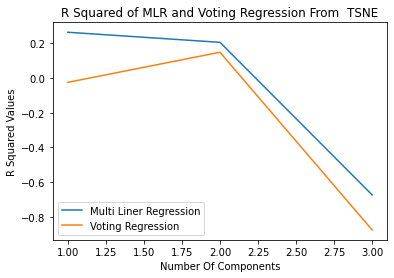

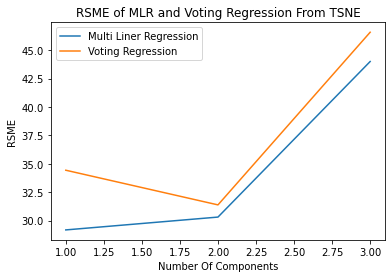

In [25]:
from sklearn.manifold import TSNE
def select_features(X_train, X_test,n):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    tsne = TSNE(n_components = n)
    X_train_fs = tsne.fit_transform(X_train)
    X_test_fs = tsne.fit_transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
for n in range(1,4):
    X_train_fs, X_test_fs = select_features(X_train, X_test,n)
    # fit the model
    print ("Multi Linear Regression From  TSNE: ",n)
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    print ("Voting Regression  From  TSNE: ",n)
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)

x = [1,2,3]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
plt.xlabel('Number Of Components')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR and Voting Regression From  TSNE')
plt.legend()
plt.show()


x1 = [1,2,3]
y3 = rmseMLR
plt.plot(x1, y3,label = "Multi Liner Regression")
y4 = rmseVR
plt.plot(x1, y4,label = "Voting Regression")
plt.xlabel('Number Of Components')
plt.ylabel('RSME')
plt.title('RSME of MLR and Voting Regression From TSNE')
plt.legend()
plt.show()

# Interpretation
TSNE performs badly on both the models (MLR and Voting Regression)  we can reduced the original data to low dimension space because after 2 components the RSME increases and R squared values decreases but the values of R squared is negative or very low.
MLR and Voting Regression with TSNE gives poor values of RSME and R squred values.